## Лабораторная работа 3.1. Подбор параметров. Композиция и сравнение моделей.

Постарайтесь оформить всю работу как один монолитный рассказ/отчет. Избегайте дублирования кода. Избегайте использования циклов, вместо этого ищите готовый алгоритм в пакетах. Подписывайте все графики, а также их оси, если график содержит несколько кривых, то обязательно пользуйтесь легендой. Также неукоснительно соблюдайте PEP8. За несоблюдение этих простейших правил итоговые баллы могут быть снижены безапелляционно.

### 1. (15 баллов) Подбор параметров 

![](https://4.bp.blogspot.com/-t6ZSm65y1sA/WN3wC24EEcI/AAAAAAAAWhI/OHjVavGAWC8BbiEwmr8qF9c9fvQFDFe7ACLcB/s1600/3849_3.PNG)

В этом и следующих заданиях вы будете работать с данными из из репозитория UCI. Датасет называется [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult). На этом датасете вы будете решать задачу бинарной классификации, нужно определить превысит ли средний заработок человека порог в $50k.

**1. (1 балл)** Загрузите набор данных `data.adult.csv`. Учтите, что пропущенные значения признаков в данных помечены как `'?'`. Проведите предобработку данных:

 - Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.
 - Сохраните целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Сохраните их отдельно.

In [1]:
from pathlib import Path
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
             'marital-status', 'occupation', 'relationship', 'race', 'sex',
             'capital-gain', 'capital-loss', 'hours-per-week',
             'native-country', 'income']

In [3]:
col_names = [col_name.replace('-', '_') for col_name in col_names]

In [4]:
col_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [5]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                   names=col_names, header=None, index_col=False)

In [6]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.shape

(32561, 15)

In [9]:
data.sample(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
25017,66,Private,174788,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,20,United-States,<=50K
14396,39,Self-emp-not-inc,343476,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,Japan,>50K
6690,60,Private,199085,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
18824,25,Private,75821,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K
18346,43,State-gov,115005,HS-grad,9,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
9325,46,Self-emp-not-inc,320421,Bachelors,13,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,25,United-States,<=50K
3658,21,Private,342575,Some-college,10,Never-married,Sales,Own-child,Black,Female,0,0,30,United-States,<=50K
13340,47,Self-emp-not-inc,255934,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,80,United-States,<=50K
5809,39,Private,52645,Some-college,10,Divorced,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K
25664,47,Private,190072,Some-college,10,Divorced,Sales,Unmarried,White,Male,0,0,50,United-States,<=50K


In [10]:
for col_name in data.select_dtypes(include=object).columns:
    print(col_name, (data[col_name].str.strip() == '?').sum())

workclass 1836
education 0
marital_status 0
occupation 1843
relationship 0
race 0
sex 0
native_country 583
income 0


In [11]:
for col_name in data.select_dtypes(include=object).columns:
    data.loc[data[col_name].str.strip() == '?', col_name] = np.nan

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
data.select_dtypes(include='object').nunique(dropna=False)

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64

In [14]:
data.select_dtypes(include='object').nunique(dropna=False).sum()

104

Так как категорий не так уж и много, закодируем все категориальные фичи в OneHot

In [15]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union, make_pipeline

In [16]:
oh_enc = OneHotEncoder(sparse=False)

In [17]:
oh_result = oh_enc.fit_transform(data.select_dtypes(include='object'))

In [18]:
oh_result.shape

(32561, 104)

In [19]:
np.hstack([data, oh_result]).shape

(32561, 119)

In [20]:
class SimpleTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, encoder=None, scaler=None, return_format='np'):
        self.encoder = encoder
        self.scaler = scaler
        self.return_format = return_format
        
    def categorical_fit(self, X, y=None):
        # Get categorical only
        self.cat_cols = X.select_dtypes(include=['object', 'category']).columns
        X = X[self.cat_cols]
        if self.encoder is not None:
            self.encoder.fit(X, y)
        return self
    
    def numerical_fit(self, X, y=None):
        self.num_cols = X.select_dtypes(exclude=['object', 'category']).columns
        X = X[self.num_cols]
        if self.scaler is not None:
            self.scaler.fit(X, y)
        return self
        
    def fit(self, X, y=None):
        self.categorical_fit(X, y)
        self.numerical_fit(X, y)
        return self
    
    def transform(self, X):
        if self.scaler:
            num_transformed = self.scaler.transform(X[self.num_cols])
        else:
            num_transformed = X[self.num_cols]
        if self.encoder:
            cat_transformed = self.encoder.transform(X[self.cat_cols])
        else:
            cat_transformed = X[self.num_cols]
            
        result = np.hstack([num_transformed, cat_transformed])
        if self.return_format == 'pd':
            return pd.DataFrame(result)
        return result

In [21]:
test_preproc = SimpleTransformer(encoder=OneHotEncoder(sparse=False), scaler=MinMaxScaler())

In [22]:
test_preproc.fit(data)

SimpleTransformer(encoder=OneHotEncoder(sparse=False), scaler=MinMaxScaler())

In [23]:
test_preproc.transform(data).shape

(32561, 110)

**2. (2 балла)** В начале посмотрим как работает подбор гиперпараметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [KNeighborClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - KNeighborClassifier — число соседей (*n_neighbors*)
 - DecisonTreeClassifier — глубина дерева (*max_depth*)
 - SGDClassifier — оптимизируемая функция (*loss*)
 
Значения остальных гиперпараметров оставляйте по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

![](https://i.stack.imgur.com/YWgro.gif)

Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. 

Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

__Для GridSearch буду использовать ParameterGrid, так как он дает большую гибкость в плане использования препроцессинга при том, что дает тот же функционал__

In [24]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
from sklearn.metrics import f1_score
from time import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [25]:
target_name = 'income'

In [26]:
data.reset_index(drop=True, inplace=True)

In [27]:
X, y = data.drop('income', axis=1), data.income

In [28]:
y.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

__Так как присутствует дисбаланс классов, а среди сравниваемых алгоритмов присутствуют классификаторы, не выдающие псевдовероятностей, то качество классификации будем сравнивать по метрике `f1`__

In [29]:
X.shape, y.shape

((32561, 14), (32561,))

In [30]:
def run_grid_search(model, params_grid,
                    encoder=OneHotEncoder(sparse=False,
                                          handle_unknown='ignore'),
                    scaler=MinMaxScaler()):
    splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=648)

    by_params_metrics = []
    for params in ParameterGrid(params_grid):
        start_t = time()
        model.set_params(**params)
        by_fold_metrics = []
        for train_ix, test_ix in splitter.split(X, y):
            X_train, y_train = X.loc[train_ix], y[train_ix]
            X_test, y_test = X.loc[test_ix], y[test_ix]
            # Preproc
            transformer = SimpleTransformer(encoder=encoder,
                                            scaler=scaler)
            X_train = transformer.fit(X_train).transform(X_train)
            X_test = transformer.transform(X_test)
            
            # Fit
            model.fit(X_train, y_train)
            # Predict
            y_pred = model.predict(X_test)
            by_fold_metrics.append(f1_score(y_test, y_pred, pos_label=' >50K'))
        end_t = time()
        by_params_metrics.append((params, by_fold_metrics))
        print(f'{params} done in {end_t - start_t} sec with f1_score={by_fold_metrics}')
        
    return by_params_metrics

In [31]:
cache_path = Path('.', 'caches')
if not cache_path.exists():
    cache_path.mkdir()

### KNN

In [32]:
%%time
fname = 'knn_gs_res.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    knn_gs_res = pickle.load(fpath.open('rb'))
else:
    param_grid = {'n_neighbors': list(range(1, 32, 2))}
    knn_gs_res = run_grid_search(KNeighborsClassifier(n_jobs=-1),
                             params_grid=param_grid)
    pickle.dump(knn_gs_res, fpath.open('wb'))

CPU times: user 1.02 ms, sys: 1.78 ms, total: 2.8 ms
Wall time: 2.78 ms


In [33]:
x = []
y_mean = []
y_std = []
for params, metrics in knn_gs_res:
    x.append(params['n_neighbors'])
    y_mean.append(np.mean(metrics))
    y_std.append(np.std(metrics))
y_mean = np.array(y_mean)
y_std = np.array(y_std)

Text(0.5, 1.0, 'KNN Grid Search Results')

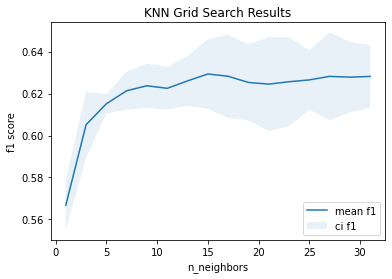

In [34]:
plt.plot(x, y_mean, label='mean f1')
plt.fill_between(x, y_mean - 2*y_std, y_mean + 2*y_std, alpha=0.1, label='ci f1')

plt.legend(loc='lower right')
plt.xlabel('n_neighbors')
plt.ylabel('f1 score')
plt.title('KNN Grid Search Results')

In [35]:
x[np.argmax(y_mean)], x[np.argmax(y_mean-2*y_std)], x[np.argmax(y_mean+2*y_std)]

(15, 13, 27)

Возьмем за оптимальное значение параметра `13`, так как при данном значении имеем близкий к лучшему среднему скор, но при этом значительно более узкий доверительный интревал.

### DecisionTree

In [36]:
%%time
fname = 'dt_gs_res.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    dt_gs_res = pickle.load(fpath.open('rb'))
else:
    param_grid = {'max_depth': list(range(1, 32, 2))}
    dt_gs_res = run_grid_search(DecisionTreeClassifier(random_state=648),
                                params_grid=param_grid,
                                scaler=None)
    pickle.dump(dt_gs_res, fpath.open('wb'))

CPU times: user 1.21 ms, sys: 2.13 ms, total: 3.34 ms
Wall time: 3.33 ms


In [37]:
x = []
y_mean = []
y_std = []
for params, metrics in dt_gs_res:
    x.append(params['max_depth'])
    y_mean.append(np.mean(metrics))
    y_std.append(np.std(metrics))
y_mean = np.array(y_mean)
y_std = np.array(y_std)

Text(0.5, 1.0, 'Decision Tree Grid Search Results')

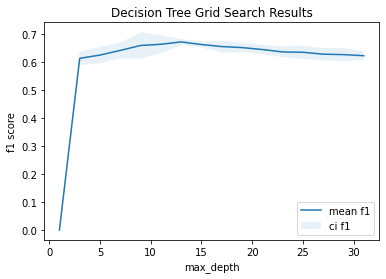

In [38]:
plt.plot(x, y_mean, label='mean f1')
plt.fill_between(x, y_mean - 2*y_std, y_mean + 2*y_std, alpha=0.1, label='ci f1')

plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.title('Decision Tree Grid Search Results')

In [39]:
x[np.argmax(y_mean)], x[np.argmax(y_mean-2*y_std)], x[np.argmax(y_mean+2*y_std)]

(13, 13, 9)

В данном случае однозначно наиболее оптимальное значение параметра равно `13`

### SGDClassifier

In [40]:
%%time
fname = 'sgd_gs_res.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    sgd_gs_res = pickle.load(fpath.open('rb'))
else:
    param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge',
                           'perceptron', 'squared_loss', 'huber',
                           'epsilon_insensitive',
                           'squared_epsilon_insensitive']}
    sgd_gs_res = run_grid_search(SGDClassifier(n_jobs=-1,
                                               random_state=648),
                                 params_grid=param_grid)
    pickle.dump(sgd_gs_res, fpath.open('wb'))

CPU times: user 680 µs, sys: 1.37 ms, total: 2.05 ms
Wall time: 1.75 ms


In [41]:
boxplot_dict = {}
for params, metrics in sgd_gs_res:
    boxplot_dict[params['loss']] = metrics

<AxesSubplot:>

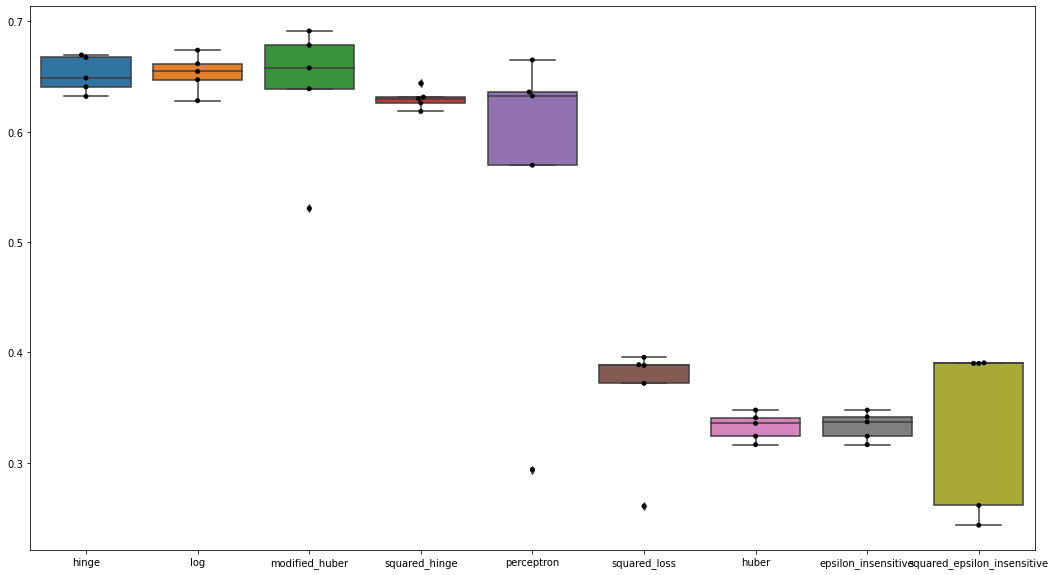

In [42]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=pd.DataFrame(boxplot_dict))
sns.swarmplot(data=pd.DataFrame(boxplot_dict), color='black')

<AxesSubplot:>

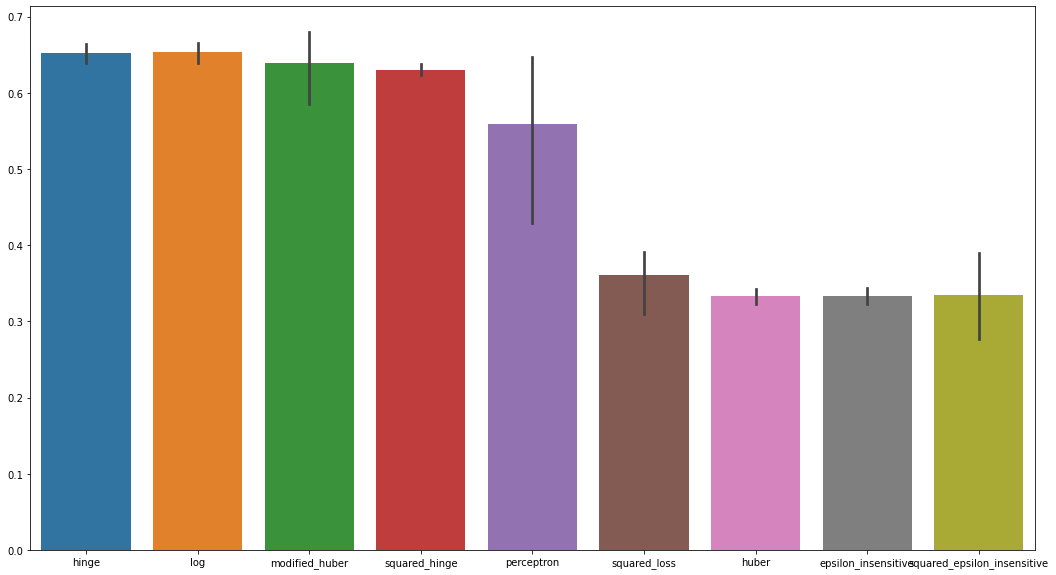

In [43]:
plt.figure(figsize=(18, 10))
sns.barplot(data=pd.DataFrame(boxplot_dict), )

Как можно наблюдать, лучший результат показывает `hinge loss` (который является дефолтным для SGDClassifier)

**3. (2 балла)** Теперь подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев: обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте найденное количество деревьев.

Применить класс *GridSearchCV* в данном задании затруднительно, поэтому предлагается самостоятельно написать цикл по числу деревьев или воспользоваться параметром `warm_start=True` ([stackoverflow](https://stackoverflow.com/questions/31808821/python-random-forest-iteratively-adding-trees)).

In [44]:
from tqdm.notebook import tqdm_notebook as tqdm

In [45]:
fname = 'rf_n_estim.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    scores = pickle.load(fpath.open('rb'))
else:
    scores = {}
    splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=648)
    for train_ix, test_ix in tqdm(splitter.split(X, y)):
        X_train, y_train = X.loc[train_ix], y[train_ix]
        X_test, y_test = X.loc[test_ix], y[test_ix]
        # Preproc
        transformer = SimpleTransformer(encoder=OneHotEncoder(sparse=False,
                                                              handle_unknown='ignore'),
                                        scaler=None)
        X_train = transformer.fit(X_train).transform(X_train)
        X_test = transformer.transform(X_test)

        # Fit
        model = RandomForestClassifier(n_jobs=-1, warm_start=True)
        for n_estimators in tqdm(range(10, 1001, 10)):
            model.set_params(n_estimators=n_estimators)
            model.fit(X_train, y_train)
            # Predict
            y_pred = model.predict(X_test)
            score = f1_score(y_test, y_pred, pos_label=' >50K')
            scores[n_estimators] = scores.get(n_estimators, []) + [score]
    pickle.dump(scores, fpath.open('wb'))

In [46]:
x = []
y_mean = []
y_std = []
for n_estim, metrics in scores.items():
    x.append(n_estim)
    y_mean.append(np.mean(metrics))
    y_std.append(np.std(metrics))
y_mean = np.array(y_mean)
y_std = np.array(y_std)

Text(0.5, 1.0, 'Random Forest Grid Search Results')

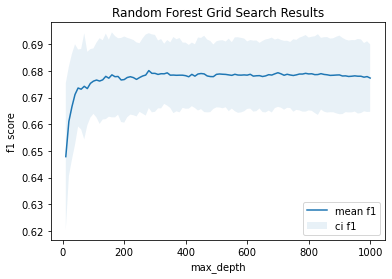

In [47]:
plt.plot(x, y_mean, label='mean f1')
plt.fill_between(x, y_mean - 2*y_std, y_mean + 2*y_std, alpha=0.1, label='ci f1')

plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.title('Random Forest Grid Search Results')

__По графику можно приблизительно сказать, что алгоритм выходит на константу при 400 деревьях__

**4. (2 балла)** Посмотрите на значения признаков *age*, *fnlwgt*, *capital-gain*. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

__Указаныые признаки являются числовыми, причем имеют разные шкалы. Данная особенность очень сильно влияет на KNN, и скорее всего на линейный классификатор__

*** 5. (2 балла)*** Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество некоторых алгоритмов и почему?

__В данном случае проведем процесс в обработном порядке и ниже будут результаты без шкалирования__

### KNN No-scale

In [48]:
%%time
fname = 'knn_gs_res_noscaling.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    knn_gs_res = pickle.load(fpath.open('rb'))
else:
    param_grid = {'n_neighbors': list(range(1, 32, 2))}
    knn_gs_res = run_grid_search(KNeighborsClassifier(n_jobs=-1),
                             params_grid=param_grid,
                                scaler=None)
    pickle.dump(knn_gs_res, fpath.open('wb'))

CPU times: user 1.13 ms, sys: 2.63 ms, total: 3.76 ms
Wall time: 7.28 ms


In [49]:
x = []
y_mean = []
y_std = []
for params, metrics in knn_gs_res:
    x.append(params['n_neighbors'])
    y_mean.append(np.mean(metrics))
    y_std.append(np.std(metrics))
y_mean = np.array(y_mean)
y_std = np.array(y_std)

Text(0.5, 1.0, 'KNN Grid Search Results')

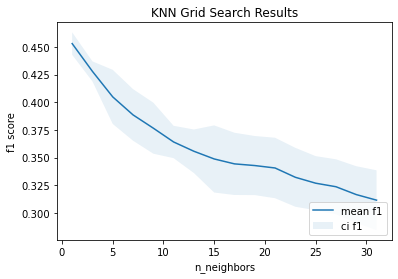

In [50]:
plt.plot(x, y_mean, label='mean f1')
plt.fill_between(x, y_mean - 2*y_std, y_mean + 2*y_std, alpha=0.1, label='ci f1')

plt.legend(loc='lower right')
plt.xlabel('n_neighbors')
plt.ylabel('f1 score')
plt.title('KNN Grid Search Results')

In [51]:
x[np.argmax(y_mean)], x[np.argmax(y_mean-2*y_std)], x[np.argmax(y_mean+2*y_std)]

(1, 1, 1)

Видим значительное ухудшение качества

### Decision Tree with scaled features

In [52]:
%%time
fname = 'dt_gs_res_scaling.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    dt_gs_res = pickle.load(fpath.open('rb'))
else:
    param_grid = {'max_depth': list(range(1, 32, 2))}
    dt_gs_res = run_grid_search(DecisionTreeClassifier(random_state=648),
                                params_grid=param_grid)
    pickle.dump(dt_gs_res, fpath.open('wb'))

CPU times: user 850 µs, sys: 1.21 ms, total: 2.06 ms
Wall time: 1.61 ms


In [53]:
x = []
y_mean = []
y_std = []
for params, metrics in dt_gs_res:
    x.append(params['max_depth'])
    y_mean.append(np.mean(metrics))
    y_std.append(np.std(metrics))
y_mean = np.array(y_mean)
y_std = np.array(y_std)

Text(0.5, 1.0, 'Decision Tree Grid Search Results')

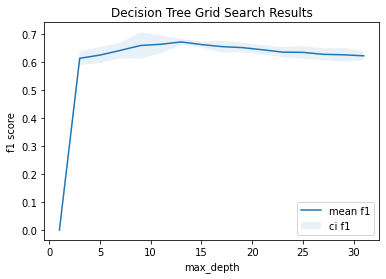

In [54]:
plt.plot(x, y_mean, label='mean f1')
plt.fill_between(x, y_mean - 2*y_std, y_mean + 2*y_std, alpha=0.1, label='ci f1')

plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.title('Decision Tree Grid Search Results')

In [55]:
x[np.argmax(y_mean)], x[np.argmax(y_mean-2*y_std)], x[np.argmax(y_mean+2*y_std)]

(13, 13, 9)

### SGDClassifier no-scale

In [56]:
%%time
fname = 'sgd_gs_res_no_scaling.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    sgd_gs_res = pickle.load(fpath.open('rb'))
else:
    param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge',
                           'perceptron', 'squared_loss', 'huber',
                           'epsilon_insensitive',
                           'squared_epsilon_insensitive']}
    sgd_gs_res = run_grid_search(SGDClassifier(n_jobs=-1,
                                               random_state=648),
                                 params_grid=param_grid,
                                scaler=None)
    pickle.dump(sgd_gs_res, fpath.open('wb'))

CPU times: user 657 µs, sys: 1.64 ms, total: 2.29 ms
Wall time: 2.43 ms


In [57]:
boxplot_dict = {}
for params, metrics in sgd_gs_res:
    boxplot_dict[params['loss']] = metrics

<AxesSubplot:>

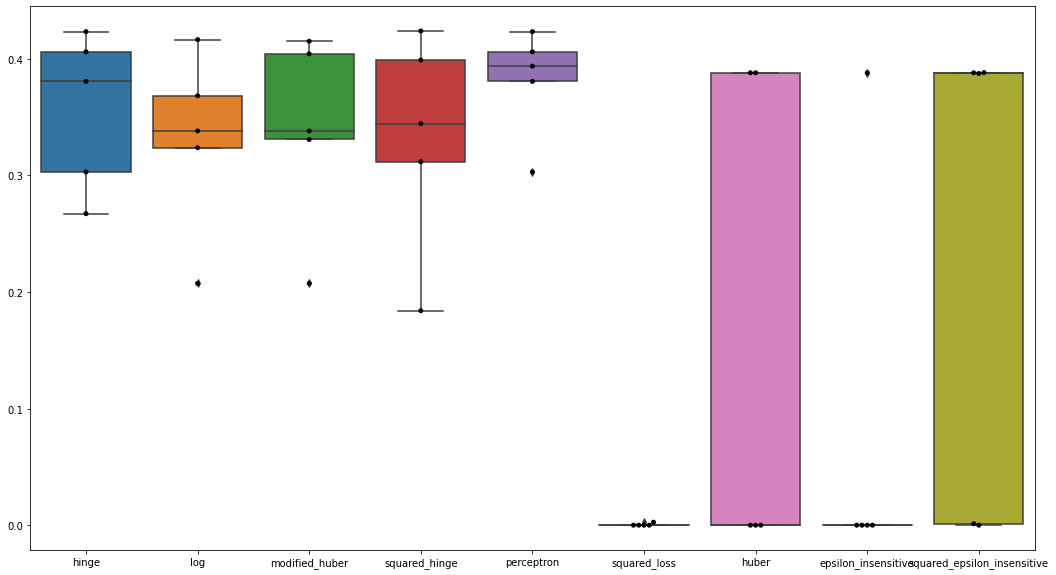

In [58]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=pd.DataFrame(boxplot_dict))
sns.swarmplot(data=pd.DataFrame(boxplot_dict), color='black')

<AxesSubplot:>

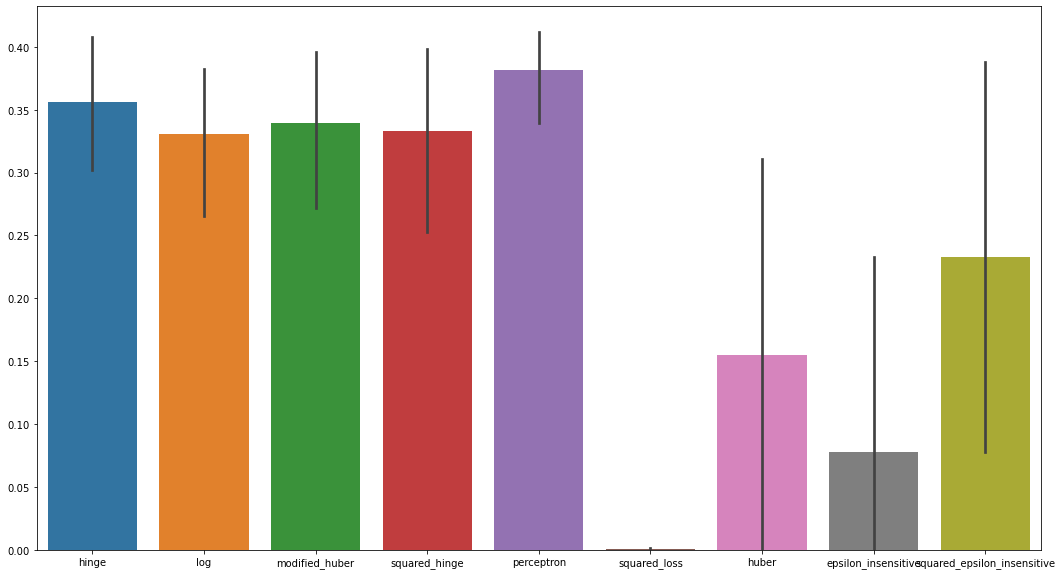

In [59]:
plt.figure(figsize=(18, 10))
sns.barplot(data=pd.DataFrame(boxplot_dict), )

__Как и предполагалось, значение метрик для `knn` и `SGDClassifier` сильно упало без шкалирования, а для дерева решений не изменилось.__

**6. (2 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и максимальное число рассматриваемых признаков (*max_features*); используйте найденное ранее каличество деревьев
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели".

Какой из алгоритмов имеет наилучшее качество? 

### KNN GridSearch n_neighbors&metric

In [60]:
%%time
fname = 'knn_gs_res_multiparams.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    knn_gs_res = pickle.load(fpath.open('rb'))
else:
    param_grid = {'n_neighbors': list(range(3, 19, 5)),
                  'metric': ['euclidean', 'manhattan', 'chebyshev']}
    knn_gs_res = run_grid_search(KNeighborsClassifier(n_jobs=-1),
                             params_grid=param_grid)
    pickle.dump(knn_gs_res, fpath.open('wb'))

CPU times: user 1.39 ms, sys: 2.48 ms, total: 3.87 ms
Wall time: 3.55 ms


In [61]:
x = []
y_mean = []
y_std = []
for params, metrics in knn_gs_res:
    x.append(params)
    y_mean.append(np.mean(metrics))
y_mean = np.array(y_mean)

In [62]:
x[np.argmax(y_mean)], np.max(y_mean)

({'metric': 'euclidean', 'n_neighbors': 13}, 0.6260600049396536)

Возьмем за оптимальное значение параметра `13`, так как при данном значении имеем близкий к лучшему среднему скор, но при этом значительно более узкий доверительный интревал.

### DesicionTree GridSearch max_depth&criterion

In [63]:
%%time
fname = 'dt_gs_res_multiparams.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    dt_gs_res = pickle.load(fpath.open('rb'))
else:
    param_grid = {'max_depth': list(range(3, 29, 5)),
                  'criterion': ['entropy', 'gini']}
    dt_gs_res = run_grid_search(DecisionTreeClassifier(random_state=648),
                                params_grid=param_grid,
                                scaler=None)
    pickle.dump(dt_gs_res, fpath.open('wb'))

CPU times: user 1.14 ms, sys: 2.19 ms, total: 3.33 ms
Wall time: 4.59 ms


In [64]:
x = []
y_mean = []
y_std = []
for params, metrics in dt_gs_res:
    x.append(params)
    y_mean.append(np.mean(metrics))
y_mean = np.array(y_mean)

In [65]:
x[np.argmax(y_mean)], np.max(y_mean)

({'criterion': 'gini', 'max_depth': 13}, 0.6713942597937496)

В данном случае однозначно наиболее оптимальное значение максимальной глубины равно `13` при критерии разделения `gini`, который является дефолтным

### SGDClassifier GridSearch loss&penalty

In [66]:
%%time
fname = 'sgd_gs_res_multiparams.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    sgd_gs_res = pickle.load(fpath.open('rb'))
else:
    param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge',
                           'perceptron', 'squared_loss', 'huber',
                           'epsilon_insensitive',
                           'squared_epsilon_insensitive'],
                  'penalty': ['l2', 'l1', 'elasticnet']}
    sgd_gs_res = run_grid_search(SGDClassifier(n_jobs=-1,
                                               random_state=648),
                                 params_grid=param_grid,
                                scaler=None)
    pickle.dump(sgd_gs_res, fpath.open('wb'))

CPU times: user 928 µs, sys: 1.92 ms, total: 2.85 ms
Wall time: 4.4 ms


In [67]:
x = []
y_mean = []
y_std = []
for params, metrics in sgd_gs_res:
    x.append(params)
    y_mean.append(np.mean(metrics))
y_mean = np.array(y_mean)

In [68]:
x[np.argmax(y_mean)], np.max(y_mean)

({'loss': 'squared_hinge', 'penalty': 'l1'}, 0.39606034356933567)

Лучший результат показывает алгоритм при квадратичном hinge loss и l1 регуляризацией

### RandomForest GridSearch criterion&max_features

In [69]:
%%time
fname = 'rf_gs_res_multiparams.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    rf_gs_res = pickle.load(fpath.open('rb'))
else:
    param_grid = {'criterion': ['entropy', 'gini'],
                  'max_features': [1, 0.2, 0.4, 0.6, 0.8, 1.0]}
    rf_gs_res = run_grid_search(RandomForestClassifier(n_jobs=-1,
                                                       n_estimators=400),
                                 params_grid=param_grid,
                                scaler=None)
    pickle.dump(rf_gs_res, fpath.open('wb'))

CPU times: user 590 µs, sys: 1.39 ms, total: 1.98 ms
Wall time: 1.85 ms


In [70]:
x = []
y_mean = []
y_std = []
for params, metrics in rf_gs_res:
    x.append(params)
    y_mean.append(np.mean(metrics))
y_mean = np.array(y_mean)

In [71]:
x[np.argmax(y_mean)], np.max(y_mean)

({'criterion': 'gini', 'max_features': 0.2}, 0.6819671873987755)

**7. (2 балла)** Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:

* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?




* Для каких целей можно использовать знание качества на обучающей части выборки?




* Какой из алгоритмов лучше обучается на меньшем числе объектов?



* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?



In [72]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

In [73]:
model_dict = {'knn': KNeighborsClassifier(metric='euclidean',
                                          n_neighbors=13,
                                          n_jobs=1),
              'dt': DecisionTreeClassifier(criterion='gini',
                                           max_depth=13,
                                           random_state=648),
              'sgd': SGDClassifier(loss='squared_hinge',
                                   penalty='l1',
                                   n_jobs=1,
                                   random_state=648),
              'rf': RandomForestClassifier(criterion='gini',
                                           max_features=0.2,
                                           n_jobs=1,
                                           random_state=648,
                                           n_estimators=400)}

In [74]:
%%time
fname = 'learning_curves.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    learning_curves = pickle.load(fpath.open('rb'))
else:
    learning_curves = {}
    for model_name, model in model_dict.items():
        start_t = time()
        total_pipeline = Pipeline([('preproc',
                                        SimpleTransformer(encoder=OneHotEncoder(sparse=False,
                                                                                handle_unknown='ignore'),
                                                          scaler=MinMaxScaler())),
                                       (model_name, model)], verbose=0)
        result = learning_curve(total_pipeline, X, y, cv=5, verbose=2,
                                n_jobs=-1, return_times=True,
                                shuffle=True, random_state=648)
        learning_curves[model_name] = result
        end_t = time()
        print(f'{model_name} done in {end_t - start_t} sec')
    pickle.dump(learning_curves, fpath.open('wb'))

CPU times: user 1.1 ms, sys: 2.07 ms, total: 3.17 ms
Wall time: 3.29 ms


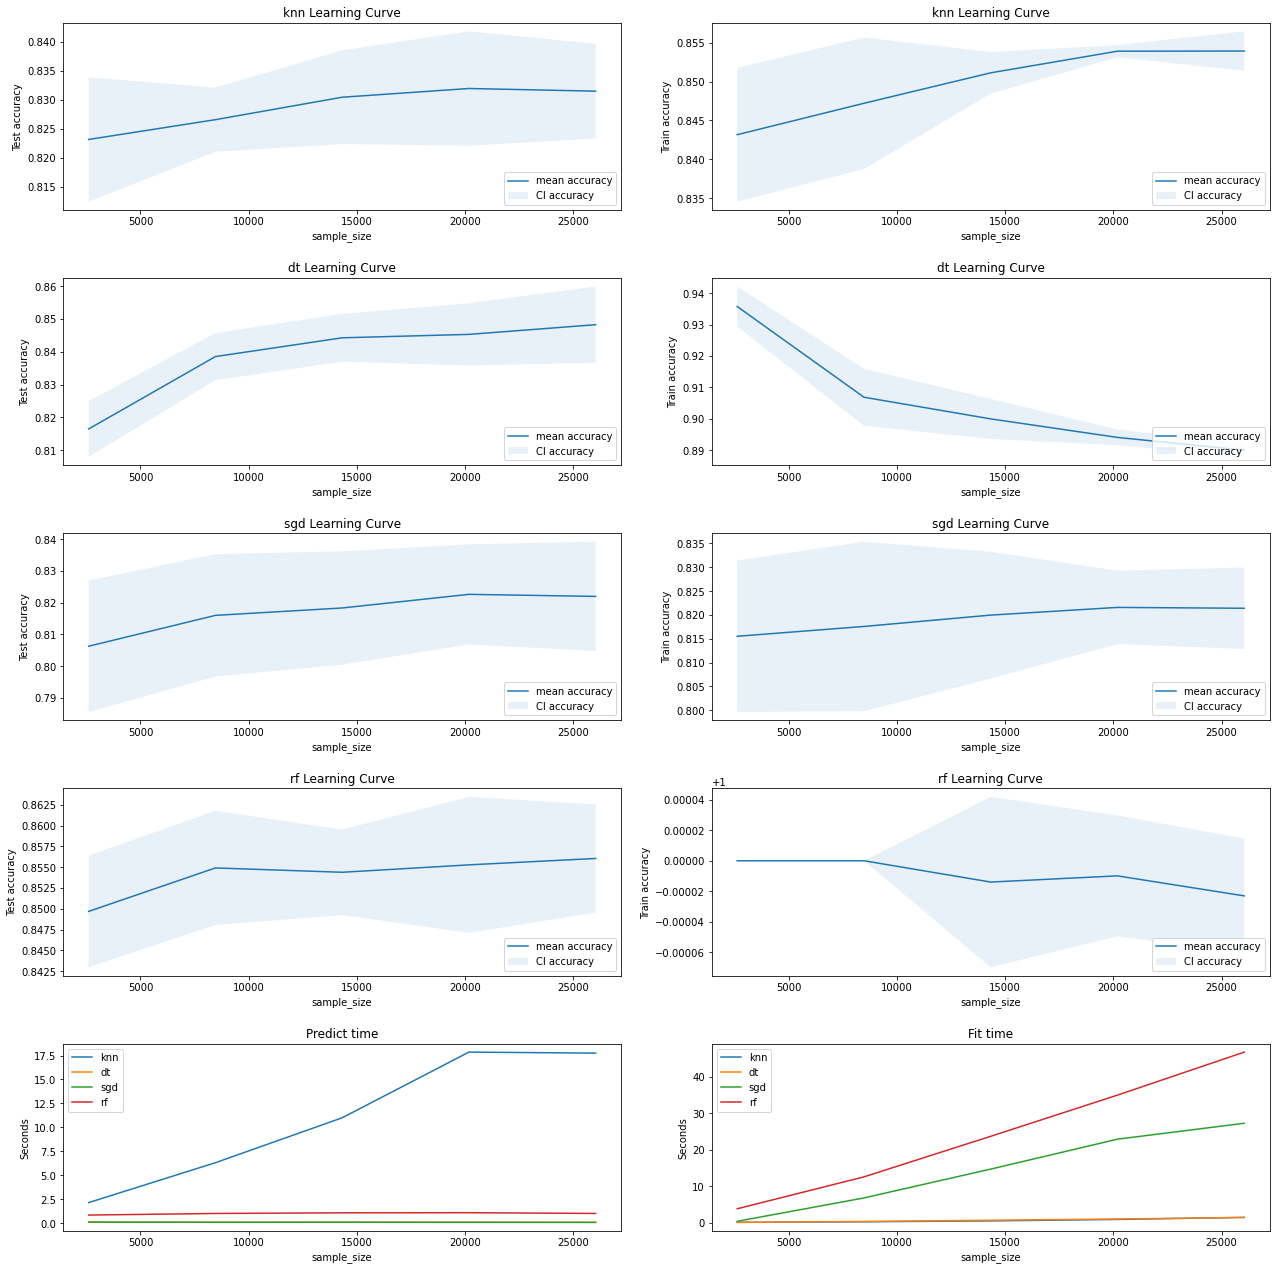

In [75]:
fig, axes = plt.subplots(5, 2, figsize=(18, 18))
for (model_name, result), axes_row in zip(learning_curves.items(), axes):
    x = result[0]
    train_acc = result[1]
    test_acc = result[2]
    fit_time = result[3]
    predict_time = result[4]
    
    mean_acc = np.mean(test_acc, axis=1)
    std_acc = np.std(test_acc, axis=1)
    
    axes_row[0].plot(x, mean_acc, label='mean accuracy')
    axes_row[0].fill_between(x, mean_acc - 2*std_acc, mean_acc + 2*std_acc,
                     alpha=0.1, label='CI accuracy')
    axes_row[0].legend(loc='lower right')
    axes_row[0].set_xlabel('sample_size')
    axes_row[0].set_ylabel('Test accuracy')
    axes_row[0].set_title(f'{model_name} Learning Curve')
    
    mean_acc = np.mean(train_acc, axis=1)
    std_acc = np.std(train_acc, axis=1)
    
    axes_row[1].plot(x, mean_acc, label='mean accuracy')
    axes_row[1].fill_between(x, mean_acc - 2*std_acc, mean_acc + 2*std_acc,
                     alpha=0.1, label='CI accuracy')
    axes_row[1].legend(loc='lower right')
    axes_row[1].set_xlabel('sample_size')
    axes_row[1].set_ylabel('Train accuracy')
    axes_row[1].set_title(f'{model_name} Learning Curve')
    
    axes[-1][1].plot(x, fit_time.mean(axis=1), label=model_name)
    axes[-1][1].set_title('Fit time')
    axes[-1][1].legend()
    axes[-1][1].set_xlabel('sample_size')
    axes[-1][1].set_ylabel('Seconds')
    
    axes[-1][0].plot(x, predict_time.mean(axis=1), label=model_name)
    axes[-1][0].set_title('Predict time')
    axes[-1][0].legend()
    axes[-1][0].set_xlabel('sample_size')
    axes[-1][0].set_ylabel('Seconds')
    
fig.tight_layout(pad=2.0)

In [76]:
{model_name: results[2].mean(axis=1).max() for model_name, results in learning_curves.items()}

{'knn': 0.8319464124104844,
 'dt': 0.8482542710836125,
 'sgd': 0.8226404165775423,
 'rf': 0.8560548955010032}

_Как можем видеть, для тестового датасета качество с увеличением обучающей выборки не уменьшается, при этом для слабого деревяного алгоритмов можем наблюдать падение метрики на обучающией выборке, вследствие того, что слабый алгоритм не может дать хорошее качество для всех тренировочных примеров (их слишком много), но при этом генерализующая способность увеличивается, так как алгоритм получает больше информации о распределениях._

_Знание об ошибке на обучающей выборке дает нам лучшее понимание, переобучился алгоритм или нет, или наоборот, если ли потенциал улучшения или алгоритм насыщен и не может дать лучше результат._

_На меньшей выборке, как можем увидеть, лучше всего обучается random forest._

_Все графики accuracy вышли на константу, а это значит, что добавление примеров скорее всего не приведет к увеличению качества предсказаний_

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**8. (1 балл)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn).

__Так как категориальные признаки, преобразованные при помощи OHE уже были использованы выше, проведем обратный эксперимент и посмотрим на только на числовых фичах__

In [77]:
X_num = X.select_dtypes(include=int)

Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем подбирать заново оптимальные гиперпараметры для моделей с учетом новых признаков (хотя правильнее было бы это сделать). 

**9. (1 балл)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами, найденными ранее. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
%%time
cv_scores = {}
for model_name, model in model_dict.items():
    cv_scores[model_name] = cross_val_score(model, X_num, y,
                                            n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


CPU times: user 323 ms, sys: 198 ms, total: 521 ms
Wall time: 34.2 s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.9s finished


In [80]:
{model_name: (cv_res.mean(), 2*cv_res.std()) for model_name, cv_res in cv_scores.items()}

{'knn': (0.7959829820608264, 0.002298839370644284),
 'dt': (0.8218113951646885, 0.004732561899163872),
 'sgd': (0.6813808076532627, 0.44056263573609017),
 'rf': (0.8081140025750804, 0.007981803175261782)}

_При добавлении закодированных категориальных признаков, качество моделей стат. значимо увеличивается_

### 2. (5 баллов) Композиция моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) \cdot \alpha + clf_2(x) \cdot (1 - \alpha)$$

где $\alpha\in [0, 1]$ — гиперпараметр нового классификатора.

**1. (3 балла)**
При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель, например, класс *GridSearchCV*, *learning_curve* и другие.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator)

_В экспериментах выше лучше всего себя показали random forest и decision tree. При этом замешивать их оценки кажется странным, потому что грубо говоря, один алгоритм уже входит в ансамбль другого. Поэтому также проведем эксперимент с композицией rf и knn_

In [81]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

In [82]:
class BlendingClassifiers(BaseEstimator, ClassifierMixin):
    def __init__(self, clf1, clf2, alpha=0.5):
        self.clf1 = clf1
        self.clf2 = clf2
        self.alpha = alpha
        
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        self.classes_ = unique_labels(y)
        
        self.clf1.fit(X, y)
        self.clf2.fit(X, y)
        
        return self
    
    def predict(self, X):
        # Check is fit had been called
#         check_is_fitted(self)

        # Input validation
        X = check_array(X)

        proba = self.clf1.predict_proba(X)*self.alpha + \
                self.clf2.predict_proba(X)*(1-self.alpha)
        return self.classes_[np.argmax(proba, axis=1)]

**2. (2 балла)** Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = {'estimator__alpha': np.arange(0, 1.01, 0.1)}

In [85]:
%%time
model = BlendingClassifiers(DecisionTreeClassifier(criterion='gini',
                                                   max_depth=13,
                                                   random_state=648),
                            RandomForestClassifier(criterion='gini',
                                                   max_features=0.2,
                                                   n_jobs=1,
                                                   random_state=648,
                                                   n_estimators=400))
total_pipeline = Pipeline([('preproc',
                            SimpleTransformer(encoder=OneHotEncoder(sparse=False,
                                                                    handle_unknown='ignore'),
                                              scaler=MinMaxScaler())),
                           ('estimator', model)], verbose=0)
gs = GridSearchCV(total_pipeline, param_grid, verbose=1, cv=5, n_jobs=-1,
                  scoring='accuracy')
gs.fit(X, y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
CPU times: user 31.3 s, sys: 348 ms, total: 31.7 s
Wall time: 13min 15s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        SimpleTransformer(encoder=OneHotEncoder(handle_unknown='ignore',
                                                                                sparse=False),
                                                          scaler=MinMaxScaler())),
                                       ('estimator',
                                        BlendingClassifiers(clf1=DecisionTreeClassifier(max_depth=13,
                                                                                        random_state=648),
                                                            clf2=RandomForestClassifier(max_features=0.2,
                                                                                        n_estimators=400,
                                                                                        n_jobs=1,
                                                                           

Text(0.5, 1.0, 'Blending Grid Search Results')

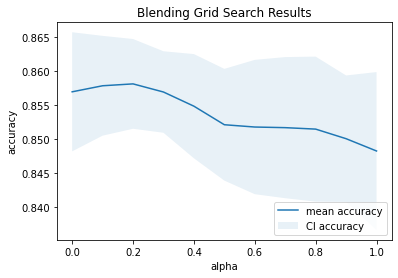

In [86]:
x = param_grid['estimator__alpha']
y_mean = gs.cv_results_['mean_test_score']
y_std = gs.cv_results_['std_test_score']

plt.plot(x, y_mean, label='mean accuracy')
plt.fill_between(x, y_mean - 2*y_std, y_mean + 2*y_std,
                 alpha=0.1, label='CI accuracy')

plt.legend(loc='lower right')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('Blending Grid Search Results')

In [87]:
%%time
model = BlendingClassifiers(SGDClassifier(loss='modified_huber',
                                   penalty='l1',
                                   n_jobs=1,
                                   random_state=648),
                            RandomForestClassifier(criterion='gini',
                                                   max_features=0.2,
                                                   n_jobs=1,
                                                   random_state=648,
                                                   n_estimators=400))
total_pipeline = Pipeline([('preproc',
                            SimpleTransformer(encoder=OneHotEncoder(sparse=False,
                                                                    handle_unknown='ignore'),
                                              scaler=MinMaxScaler())),
                           ('estimator', model)], verbose=0)
gs = GridSearchCV(total_pipeline, param_grid, verbose=2, cv=5, n_jobs=-1,
                  scoring='accuracy')
gs.fit(X, y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
CPU times: user 37.1 s, sys: 541 ms, total: 37.6 s
Wall time: 14min 2s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        SimpleTransformer(encoder=OneHotEncoder(handle_unknown='ignore',
                                                                                sparse=False),
                                                          scaler=MinMaxScaler())),
                                       ('estimator',
                                        BlendingClassifiers(clf1=SGDClassifier(loss='modified_huber',
                                                                               n_jobs=1,
                                                                               penalty='l1',
                                                                               random_state=648),
                                                            clf2=RandomForestClassifier(max_features=0.2,
                                                                                        n_estimators=400,


Text(0.5, 1.0, 'Blending Grid Search Results')

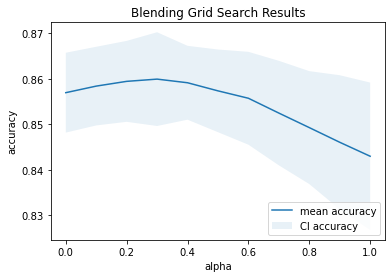

In [88]:
x = param_grid['estimator__alpha']
y_mean = gs.cv_results_['mean_test_score']
y_std = gs.cv_results_['std_test_score']

plt.plot(x, y_mean, label='mean accuracy')
plt.fill_between(x, y_mean - 2*y_std, y_mean + 2*y_std,
                 alpha=0.1, label='CI accuracy')

plt.legend(loc='lower right')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('Blending Grid Search Results')

In [89]:
{'alpha': x[np.argmax(y_mean)], 'mean_accuracy': np.max(y_mean)}

{'alpha': 0.30000000000000004, 'mean_accuracy': 0.8599553208834646}

In [90]:
%%time
model = BlendingClassifiers(SGDClassifier(loss='modified_huber',
                                   penalty='l1',
                                   n_jobs=1,
                                   random_state=648),
                            KNeighborsClassifier(metric='euclidean',
                                          n_neighbors=13,
                                          n_jobs=1))
total_pipeline = Pipeline([('preproc',
                            SimpleTransformer(encoder=OneHotEncoder(sparse=False,
                                                                    handle_unknown='ignore'),
                                              scaler=MinMaxScaler())),
                           ('estimator', model)], verbose=0)
gs = GridSearchCV(total_pipeline, param_grid, verbose=2, cv=5, n_jobs=-1,
                  scoring='accuracy')
gs.fit(X, y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
CPU times: user 5.12 s, sys: 391 ms, total: 5.51 s
Wall time: 5min


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        SimpleTransformer(encoder=OneHotEncoder(handle_unknown='ignore',
                                                                                sparse=False),
                                                          scaler=MinMaxScaler())),
                                       ('estimator',
                                        BlendingClassifiers(clf1=SGDClassifier(loss='modified_huber',
                                                                               n_jobs=1,
                                                                               penalty='l1',
                                                                               random_state=648),
                                                            clf2=KNeighborsClassifier(metric='euclidean',
                                                                                      n_jobs=1,
          

Text(0.5, 1.0, 'Blending Grid Search Results')

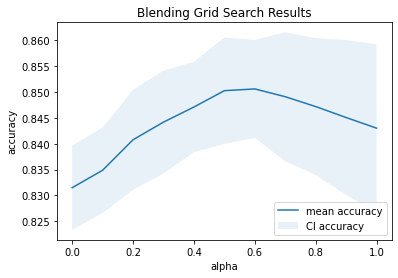

In [91]:
x = param_grid['estimator__alpha']
y_mean = gs.cv_results_['mean_test_score']
y_std = gs.cv_results_['std_test_score']

plt.plot(x, y_mean, label='mean accuracy')
plt.fill_between(x, y_mean - 2*y_std, y_mean + 2*y_std,
                 alpha=0.1, label='CI accuracy')

plt.legend(loc='lower right')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('Blending Grid Search Results')

In [92]:
{'alpha': x[np.argmax(y_mean)], 'mean_accuracy': np.max(y_mean)}

{'alpha': 0.6000000000000001, 'mean_accuracy': 0.8505882017858066}

_Лучшей связкой для простейшейго блендинга оказалась пара rf+SGDClassifier, дав прирост на 0.003_

Возможно, блендинг моделей разной природы хорошо работает, потому что это увеличичивает ансамбль, при этом алгоритмы в получившемся ансамбле очень слабо скоррелированы => такой блендинг уменьшает variance.

### 3. (5 баллов) Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей правильным продолжением является сравнение их между собой. На семинаре по визуализации вам было показано как строить "ящик с усами" (диаграмму размаха). Воспользуемся ей для сравнения алгоритмов между собой. 

**1. (5 баллов)** Для каждого типа классификатора (KNeighborClassifier, DecisionTreeClassifier, RandomForestClassifier, SGDClassifier), а так же смешанной модели, выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [93]:
model_dict['rf+sgd blend'] = BlendingClassifiers(
    SGDClassifier(loss='modified_huber',
                  penalty='l1',
                  n_jobs=1,
                  random_state=648),
    RandomForestClassifier(criterion='gini',
                           max_features=0.2,
                           n_jobs=1,
                           random_state=648,
                           n_estimators=400),
    alpha=0.3
)

In [94]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

In [95]:
%%time
cv_scores = {}
for model_name, model in model_dict.items():
    total_pipeline = Pipeline([('preproc',
                                SimpleTransformer(encoder=OneHotEncoder(sparse=False,
                                                                        handle_unknown='ignore'),
                                                  scaler=MinMaxScaler())),
                               ('estimator', model)], verbose=0)
    cv_scores[model_name] = cross_validate(total_pipeline, X, y,
                                           n_jobs=-1, verbose=2, cv=5,
                                           scoring={
                                               'f1_score': make_scorer(f1_score, pos_label=' >50K'),
                                               'accuracy_score': make_scorer(accuracy_score)
                                           })

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   51.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


CPU times: user 813 ms, sys: 176 ms, total: 988 ms
Wall time: 4min 27s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


In [96]:
cv_scores

{'knn': {'fit_time': array([1.14206195, 1.18582892, 1.14245772, 1.09454107, 1.26407504]),
  'score_time': array([30.20405912, 33.84126902, 34.06089497, 33.78306103,  6.95201397]),
  'test_f1_score': array([0.61136284, 0.61648501, 0.62436376, 0.63917526, 0.62820075]),
  'test_accuracy_score': array([0.82880393, 0.82708845, 0.83000614, 0.83875921, 0.83277027])},
 'dt': {'fit_time': array([1.93452168, 2.03451896, 2.02905202, 1.92202592, 0.84181309]),
  'score_time': array([0.25170302, 0.18160892, 0.18699193, 0.24414396, 0.10980701]),
  'test_f1_score': array([0.64423077, 0.65972945, 0.67200512, 0.6647482 , 0.67776298]),
  'test_accuracy_score': array([0.84093352, 0.84935504, 0.84275184, 0.85687961, 0.85135135])},
 'sgd': {'fit_time': array([34.53913879, 34.35399604, 34.57500196, 33.9598217 , 16.744802  ]),
  'score_time': array([0.2047801 , 0.186759  , 0.15996408, 0.26990509, 0.10555005]),
  'test_f1_score': array([0.53831041, 0.53025048, 0.54857589, 0.54135338, 0.58922068]),
  'test_accu

Text(0.5, 1.0, 'Accuracy Score')

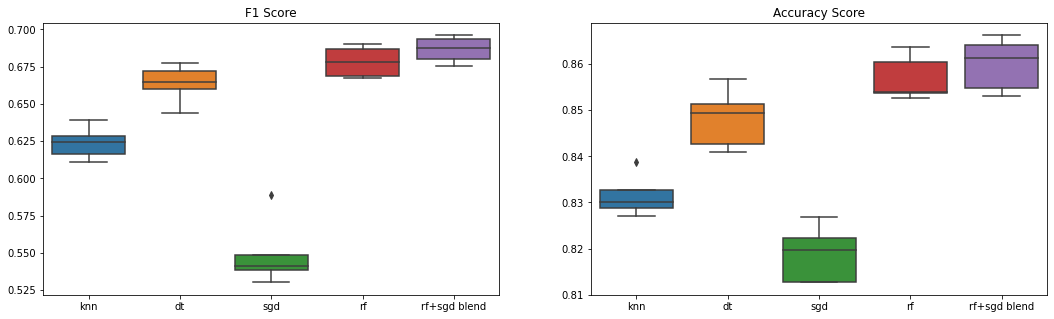

In [97]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=pd.DataFrame({model_name: cv_res['test_f1_score'] 
                              for model_name, cv_res in cv_scores.items()}))
plt.title('F1 Score')

plt.subplot(1, 2, 2)
sns.boxplot(data=pd.DataFrame({model_name: cv_res['test_accuracy_score'] 
                              for model_name, cv_res in cv_scores.items()}))
plt.title('Accuracy Score')

_Алгоритмы с большим ансамблем показали лучший результат. При этом блендинг с моделью другой природы (sgd+rf) дал еще больше точности, при том, что sgd показал худший результат. Точность sgd очень сильно зависит от выбранной функции ошибки, остальные алгоритмы в целом, при адекватных занчениях парамтеров, имеют точность на константе._

### 4. (15 баллов) Бонусное задание

**1. (5 баллов)** Продолжим работать с датасетом `data.adult.csv`. Сделайте двухуровневый [стекинг моделей](https://alexanderdyakonov.wordpress.com/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending/).
На нулевом уровне (в качестве базовых классификаторов) используйте пять лучших ранее полученных моделей. На первом уровне (в качестве метаклассификатора) используйте логистическую регрессию (LogisticRegressionCV), у которой подберите по сетке параметры `penalty` и `C` на метапризнаках. Для стекинга используйте библиотеку [brew](https://pypi.python.org/pypi/brew/0.1.4) или сделайте свою собственную реализацию классического стекинга.
Постройте `barplot`, на котором изобразите метрику качества каждой базовой модели нулевого уровня и самого метаклассификатора.

In [98]:
from sklearn.linear_model import LogisticRegression

_Brew не поддерживается и даже не запускается :(_

In [99]:
np.hstack([X, np.array(y).reshape(-1, 1)]).shape

(32561, 15)

In [100]:
class StackingClassifiers(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers_dict, meta_classifier,
                 random_state=648, n_splits=5):
        self.classifiers_dict = classifiers_dict
        # Save list to list for sake of saving order
        self.clf_labels = [model_name for model_name in classifiers_dict]
        self.meta_classifier = meta_classifier
        self.n_splits = n_splits
        self.random_state = random_state
        
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        self.classes_ = unique_labels(y)
        
        predicts = {model_name: np.zeros_like(y)
                    for model_name in self.clf_labels}
        
        # Как учил Дьяконов, собираем предикты на фолдах и на них учим метаклассификатор
        splitter = StratifiedKFold(n_splits=self.n_splits, shuffle=True,
                                   random_state=self.random_state)
        for train_ix, test_ix in splitter.split(X, y):
            X_train, y_train = X[train_ix], y[train_ix]
            X_test = X[test_ix]
            for model_name, model in self.classifiers_dict.items():
                model.fit(X_train, y_train)
                y_pred = model.predict_proba(X_test)[:, 1]
                predicts[model_name][test_ix] = y_pred
        X_full = np.hstack([X] + [predicts[model_name].reshape(-1, 1)
                                  for model_name in self.clf_labels])
        self.meta_classifier.fit(X_full, y)
        
        return self
    
    def predict(self, X):
        predicts = {}

        for model_name, model in self.classifiers_dict.items():
            y_pred = model.predict_proba(X)[:, 1]
            predicts[model_name] = y_pred
        
        X_full = np.hstack([X] + [predicts[model_name].reshape(-1, 1)
                                  for model_name in self.clf_labels])
        return self.meta_classifier.predict(X_full)

In [101]:
total_pipeline = Pipeline([('preproc',
                            SimpleTransformer(
                                encoder=OneHotEncoder(sparse=False,
                                                      handle_unknown='ignore'),
                                scaler=MinMaxScaler(),
                                return_format='pd'
                            )
                            ),
                           ('estimator',
                            StackingClassifiers(
                                {
                                    'knn': KNeighborsClassifier(metric='euclidean',
                                                                n_neighbors=13,
                                                                n_jobs=1),
                                    'dt': DecisionTreeClassifier(criterion='gini',
                                                                 max_depth=13,
                                                                 random_state=648),
                                    'sgd': SGDClassifier(loss='modified_huber',
                                                         penalty='l1',
                                                         n_jobs=1,
                                                         random_state=648,
                                                         # исключаем недообучение
                                                         max_iter=10_000),
                                    'rf': RandomForestClassifier(criterion='gini',
                                                                 max_features=0.2,
                                                                 n_jobs=1,
                                                                 random_state=648,
                                                                 n_estimators=400)
                                },
                                LogisticRegression(solver='saga')))])

In [102]:
param_grid = {'estimator__meta_classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'estimator__meta_classifier__C': [0.1, 0.5, 1.0, 5, 10]}

In [103]:
%%time
fname = 'stacking_gs.pkl'
fpath = cache_path.joinpath(fname)
if fpath.exists():
    gs = pickle.load(fpath.open('rb'))
else:
    gs = GridSearchCV(total_pipeline, param_grid, verbose=5, cv=5, n_jobs=-1,
                      scoring='accuracy')
    gs.fit(X, y)
    pickle.dump(gs, fpath.open('wb'))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/aapiskotin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.85977099 0.86029316        nan 0.86050816 0.86035456 0.86038532
        nan 0.86053887 0.86029317 0.86087671        nan 0.86050816
 0.86069243 0.86063098        nan 0.86053887 0.8606003  0.86075384
        nan 0.86053887]
  warnings.warn(
/Users/aapiskotin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


CPU times: user 2min 41s, sys: 8.69 s, total: 2min 50s
Wall time: 1h 53min 58s


In [108]:
gs_df = pd.DataFrame(gs.cv_results_)

In [113]:
best_stacking_params = gs_df[gs_df.rank_test_score == 1].params

In [119]:
best_stacking_params = best_stacking_params.values[0]

In [122]:
best_stacking_params

{'estimator__meta_classifier__C': 1.0,
 'estimator__meta_classifier__penalty': 'l2'}

In [131]:
total_pipeline.set_params(**best_stacking_params)

Pipeline(steps=[('preproc',
                 SimpleTransformer(encoder=OneHotEncoder(handle_unknown='ignore',
                                                         sparse=False),
                                   return_format='pd', scaler=MinMaxScaler())),
                ('estimator',
                 StackingClassifiers(classifiers_dict={'dt': DecisionTreeClassifier(max_depth=13,
                                                                                    random_state=648),
                                                       'knn': KNeighborsClassifier(metric='euclidean',
                                                                                   n_jobs=1,
                                                                                   n_neighbors=13),
                                                       'rf': RandomForestClassifier(max_features=0.2,
                                                                                    n_estimators=400,
       

Дефолтные параметры метаклассификатор показали лучший результат

In [132]:
%%time
stacking_scores = cross_validate(total_pipeline, X, y,
                                 n_jobs=-1, verbose=2, cv=5,
                                 scoring={
                                     'f1_score': make_scorer(f1_score, pos_label=' >50K'),
                                     'accuracy_score': make_scorer(accuracy_score)
                                 })

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.0min finished


CPU times: user 233 ms, sys: 224 ms, total: 457 ms
Wall time: 11min


In [133]:
cv_scores['stacking'] = stacking_scores

Text(0.5, 1.0, 'Accuracy Score')

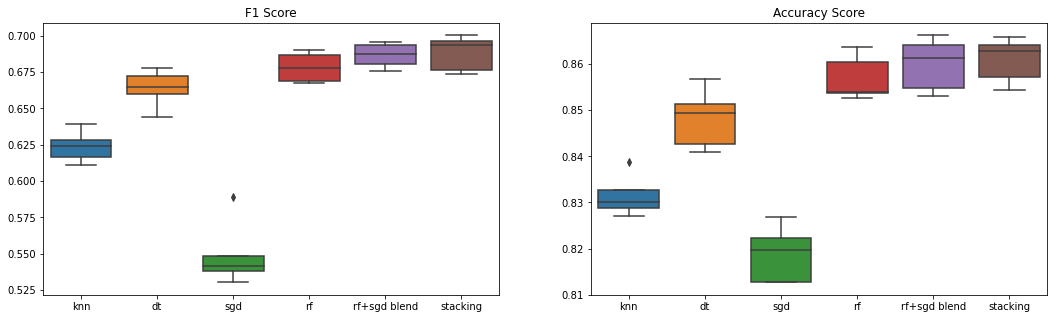

In [134]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=pd.DataFrame({model_name: cv_res['test_f1_score'] 
                              for model_name, cv_res in cv_scores.items()}))
plt.title('F1 Score')

plt.subplot(1, 2, 2)
sns.boxplot(data=pd.DataFrame({model_name: cv_res['test_accuracy_score'] 
                              for model_name, cv_res in cv_scores.items()}))
plt.title('Accuracy Score')

_Стэкинг не показал стат. значимого улучшения качества. Точность алгоритма оказалась на уровне примитивного блендинга.

**2. (5 баллов)** Предложите алгоритм оптимального бинарного решающего дерева для задачи регресси на $l$ объектах в $n$-мерном пространстве с асимптотической сложностью $O(nl\log l)$. В качестве предикатов нужно рассматривать пороговые правила (наиболее распространенный случай для использования на практике). Для простоты можно считать, что получающееся дерево близко у сбалансированному и в качестве ошибки используется MSE:
$$
Q = \frac{1}{l}\sum_{i=1}^{l}(y_i - \tilde y_i)^2
$$

Под оптимальностью в данной задаче подразумевается, что в каждом узле дерева делается оптимальное с точки зрения MSE разбиение на два поддерева.

In [104]:
# YOUR ANSWER HERE

**3. (2+3 баллов)** Пусть имеется построенное решающее дерево для задачи многоклассовой классификации. Рассмотрим лист дерева с номером $m$ и объекты $R_m$ , попавшие в него. Обозначим за $p_{mk}$ долю объектов
$k$-го класса в листе $m$. Индексом Джини этого листа называется величина
$$
\sum_{k=1}^K p_{mk}(1 − p_{mk} ),
$$
где $K$ — общее количество классов. Индекс Джини обычно служит мерой того, насколько хорошо
в данном листе выделен какой-то один класс (так называемая [impurity function](https://onlinecourses.science.psu.edu/stat857/node/52)).
1. Поставим в соответствие листу $m$ алгоритм классификации $a(x)$, который предсказывает класс
случайно, причем класс $k$ выбирается с вероятностью $p_{mk}$ . Покажите, что матожидание ча-
стоты ошибок этого алгоритма на объектах из R m равно индексу Джини.
2. Дисперсией класса k назовем дисперсию выборки $\{[y_i = k] : x_i \in R_m\}$, где $y_i$ — класс объекта $x_i$ , $[f ]$ — индикатор истинности выражения $f$, равный 1 если $f$ верно, и нулю в противном
случае, а $R_m$ — множество объектов в листе. Покажите, что сумма дисперсий всех классов в
заданном листе равна его индексу Джини.

In [105]:
# YOUR ANSWER HERE

# P.S.
Изначально не прочитал указания по предобработке и поэтому использовал сразу и шкалирование и кодирование признаков, поэтому рассказ получился немного смазанным